In [3]:
import os
import shutil
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
from astropy.coordinates import SkyCoord
import astropy.units as u
import h5py
import sunpy.map as smap
from sunpy.net import Fido, attrs as a
import glob
from astropy.modeling import models, fitting
import warnings
warnings.filterwarnings("ignore")
import hazel
label = ['I', 'Q', 'U', 'V']

# Index

1. Sunspot date and observable

2. Download the maps

3. Plot the sunspot region of interest

4. Save submaps in a new folder

5. Checking saved maps

# 1. Sunspot date and observable



In [4]:
#Observables: Stokes, magnetogram, and B maps (B inclination, B azimuth, B field, ...)


date_i_sunspot = '2012-11-17T01:04:00'
date_f_sunspot = '2012-11-17T01:04:00'

project_path = '/home/miguel/Solar-physics-project/Thesis/' #if changed, modify this

path_stokes = project_path +'stokes_data/'+'stokes_'+ date_i_sunspot+'/'
path_magnetogram = project_path + 'magnetograms/magnetogram_'+ date_i_sunspot+'/'
path_B_maps = project_path + 'magnetograms/B_maps_'+ date_i_sunspot+'/'


#Before 2010

magnetogram = Fido.search(a.Time(date_i_sunspot, date_f_sunspot),a.jsoc.Series('mdi.fd_M_96m_lev182'),a.jsoc.Notify('malzateb1@eafit.edu.co'))
print(magnetogram)


In [3]:
#After 2010
Stokes = Fido.search(a.Time(date_i_sunspot, date_f_sunspot),a.jsoc.Series('hmi.s_720s'),a.jsoc.Notify('malzateb1@eafit.edu.co'))
print(Stokes)

magnetogram = Fido.search(a.Time(date_i_sunspot, date_f_sunspot),a.jsoc.Series('hmi.M_720s'),a.jsoc.Segment('magnetogram'),a.jsoc.Notify('malzateb1@eafit.edu.co'))
print(magnetogram)
                     
B_maps = Fido.search(a.Time(date_i_sunspot, date_f_sunspot),a.jsoc.Series('hmi.B_720s'),a.jsoc.Segment('field'),a.jsoc.Notify('malzateb1@eafit.edu.co'))
print(B_maps)
##a.jsoc.Segment('field')
                     

Results from 1 Provider:

1 Results from the JSOCClient:
         T_REC          TELESCOP  INSTRUME WAVELNTH CAR_ROT
----------------------- -------- --------- -------- -------
2012.11.17_01:00:00_TAI  SDO/HMI HMI_SIDE1   6173.0    2130


Results from 1 Provider:

1 Results from the JSOCClient:
         T_REC          TELESCOP  INSTRUME WAVELNTH CAR_ROT
----------------------- -------- --------- -------- -------
2012.11.17_01:00:00_TAI  SDO/HMI HMI_SIDE1   6173.0    2130


Results from 1 Provider:

1 Results from the JSOCClient:
         T_REC          TELESCOP  INSTRUME WAVELNTH CAR_ROT
----------------------- -------- --------- -------- -------
2012.11.17_01:00:00_TAI  SDO/HMI HMI_SIDE1   6173.0    2130




# 2. Download the maps

In [ ]:
if os.path.exists(path_stokes):
    shutil.rmtree(path_stokes)
os.makedirs(path_stokes)
download_file_Stokes = Fido.fetch(Stokes, path = path_stokes)
print(download_file_Stokes)

Export request pending. [id="JSOC_20240107_743", status=2]
Waiting for 0 seconds...
Export request pending. [id="JSOC_20240107_743", status=1]
Waiting for 5 seconds...
Export request pending. [id="JSOC_20240107_743", status=1]
Waiting for 5 seconds...
Export request pending. [id="JSOC_20240107_743", status=1]
Waiting for 5 seconds...
Export request pending. [id="JSOC_20240107_743", status=1]
Waiting for 5 seconds...
Export request pending. [id="JSOC_20240107_743", status=1]
Waiting for 5 seconds...
24 URLs found for download. Full request totalling 272MB


Files Downloaded:   0%|          | 0/24 [00:00<?, ?file/s]




hmi.s_720s.20121117_010000_TAI.1.I1.fits:   0%|          | 0.00/16.5M [00:00<?, ?B/s]

hmi.s_720s.20121117_010000_TAI.1.Q0.fits:   0%|          | 0.00/10.7M [00:00<?, ?B/s]



hmi.s_720s.20121117_010000_TAI.1.V0.fits:   0%|          | 0.00/10.8M [00:00<?, ?B/s]


hmi.s_720s.20121117_010000_TAI.1.U0.fits:   0%|          | 0.00/10.7M [00:00<?, ?B/s]

hmi.s_720s.20121117_010000_TAI.1.Q0.fits:   0%|          | 100/10.7M [00:00<20:14:06, 147B/s]

hmi.s_720s.20121117_010000_TAI.1.Q0.fits:   1%|          | 64.9k/10.7M [00:00<01:35, 111kB/s]


hmi.s_720s.20121117_010000_TAI.1.U0.fits:   0%|          | 100/10.7M [00:00<21:37:30, 137B/s]
hmi.s_720s.20121117_010000_TAI.1.I0.fits:   0%|          | 0.00/16.1M [00:00<?, ?B/s]

hmi.s_720s.20121117_010000_TAI.1.Q0.fits:   2%|▏         | 196k/10.7M [00:00<00:30, 343kB/s] 


hmi.s_720s.20121117_010000_TAI.1.U0.fits:   0%|          | 32.5k/10.7M [00:00<03:24, 52.0kB/s]



hmi.s_720s.20121117_

In [5]:
if os.path.exists(path_magnetogram):
    shutil.rmtree(path_magnetogram)
os.makedirs(path_magnetogram)
download_file_magnetogram = Fido.fetch(magnetogram, path = path_magnetogram)
print(download_file_magnetogram)

Export request pending. [id="JSOC_20240107_747", status=2]
Waiting for 0 seconds...
Export request pending. [id="JSOC_20240107_747", status=1]
Waiting for 5 seconds...
Export request pending. [id="JSOC_20240107_747", status=1]
Waiting for 5 seconds...
Export request pending. [id="JSOC_20240107_747", status=1]
Waiting for 5 seconds...
1 URLs found for download. Full request totalling 14MB


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]
hmi.m_720s.20121117_010000_TAI.1.magnetogram.fits:   0%|          | 0.00/14.4M [00:00<?, ?B/s]
hmi.m_720s.20121117_010000_TAI.1.magnetogram.fits:   0%|          | 100/14.4M [00:01<69:41:50, 57.3B/s]
hmi.m_720s.20121117_010000_TAI.1.magnetogram.fits:   0%|          | 64.9k/14.4M [00:01<04:52, 48.9kB/s]
hmi.m_720s.20121117_010000_TAI.1.magnetogram.fits:   1%|▏         | 196k/14.4M [00:01<01:23, 171kB/s]  
hmi.m_720s.20121117_010000_TAI.1.magnetogram.fits:   2%|▏         | 343k/14.4M [00:02<00:42, 328kB/s]
hmi.m_720s.20121117_010000_TAI.1.magnetogram.fits:   4%|▎         | 524k/14.4M [00:02<00:25, 538kB/s]
hmi.m_720s.20121117_010000_TAI.1.magnetogram.fits:   5%|▌         | 753k/14.4M [00:02<00:16, 831kB/s]
hmi.m_720s.20121117_010000_TAI.1.magnetogram.fits:   7%|▋         | 982k/14.4M [00:02<00:11, 1.12MB/s]
hmi.m_720s.20121117_010000_TAI.1.magnetogram.fits:   8%|▊         | 1.21M/14.4M [00:02<00:09, 1.34MB/s]
hmi.m_720s.20121117_01

['/home/miguel/Solar-physics-project/Thesis/magnetograms/magnetogram_2012-11-17T01:04:00/hmi.m_720s.20121117_010000_TAI.1.magnetogram.fits']


In [6]:
if os.path.exists(path_B_maps):
    shutil.rmtree(path_B_maps)
os.makedirs(path_B_maps)
download_file_B_maps = Fido.fetch(B_maps, path = path_B_maps)
print(download_file_B_maps)

Export request pending. [id="JSOC_20240107_748", status=2]
Waiting for 0 seconds...
Export request pending. [id="JSOC_20240107_748", status=1]
Waiting for 5 seconds...
Export request pending. [id="JSOC_20240107_748", status=1]
Waiting for 5 seconds...
Export request pending. [id="JSOC_20240107_748", status=1]
Waiting for 5 seconds...
1 URLs found for download. Full request totalling 21MB


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]
hmi.b_720s.20121117_010000_TAI.field.fits:   0%|          | 0.00/22.0M [00:00<?, ?B/s]
hmi.b_720s.20121117_010000_TAI.field.fits:   0%|          | 100/22.0M [00:00<45:52:40, 133B/s]
hmi.b_720s.20121117_010000_TAI.field.fits:   0%|          | 64.9k/22.0M [00:00<03:33, 103kB/s]
hmi.b_720s.20121117_010000_TAI.field.fits:   1%|          | 196k/22.0M [00:00<01:08, 319kB/s] 
hmi.b_720s.20121117_010000_TAI.field.fits:   1%|▏         | 327k/22.0M [00:01<00:44, 492kB/s]
hmi.b_720s.20121117_010000_TAI.field.fits:   2%|▏         | 491k/22.0M [00:01<00:29, 720kB/s]
hmi.b_720s.20121117_010000_TAI.field.fits:   3%|▎         | 655k/22.0M [00:01<00:23, 904kB/s]
hmi.b_720s.20121117_010000_TAI.field.fits:   4%|▍         | 851k/22.0M [00:01<00:18, 1.14MB/s]
hmi.b_720s.20121117_010000_TAI.field.fits:   4%|▍         | 990k/22.0M [00:01<00:17, 1.19MB/s]
hmi.b_720s.20121117_010000_TAI.field.fits:   5%|▌         | 1.13M/22.0M [00:01<00:17, 1.20MB/s]
hm

['/home/miguel/Solar-physics-project/Thesis/magnetograms/B_maps_2012-11-17T01:04:00/hmi.b_720s.20121117_010000_TAI.field.fits']


In [5]:
stokes_data_glob = sorted(glob.glob(path_stokes+'/*.fits'))
stokes_gn = 81
print(stokes_data_glob[0][stokes_gn:])

magnetogram_data_glob = sorted(glob.glob(path_magnetogram+'/*.fits'))
magnetogram_gn = 87
print(magnetogram_data_glob[0][magnetogram_gn:])

B_maps_data_glob = sorted(glob.glob(path_B_maps+'/*.fits'))
B_maps_gn = 82
print(B_maps_data_glob[0][B_maps_gn:])


hdul = fits.open(stokes_data_glob[0][:])
hdul[1].header[:]
print('[arcsec/pixel]: ',hdul[1].header['CDELT1'])

hmi.s_720s.20121117_010000_TAI.1.I0.fits
hmi.m_720s.20121117_010000_TAI.1.magnetogram.fits
hmi.b_720s.20121117_010000_TAI.field.fits
[arcsec/pixel]:  0.504298508


# 3. Plot the sunspot region of interest

In [7]:
#Check the sun's map of the chosen date and the region to create the submap
print(stokes_data_glob[0][:])
stokes_xmap = smap.Map(stokes_data_glob[0][:])

print(magnetogram_data_glob[0][:])
magnetogram_xmap = smap.Map(magnetogram_data_glob[0][:])

print(B_maps_data_glob[0][:])
B_maps_xmap = smap.Map(B_maps_data_glob[0][:])

stokes_rmap = stokes_xmap.rotate()
magnetogram_rmap = magnetogram_xmap.rotate()
B_maps_rmap = B_maps_xmap.rotate()


#Set the size of the square in arcsec
longitude = 100
latitude = 100
width =longitude*u.arcsec
height =latitude*u.arcsec
bottom_left=SkyCoord((-70 - longitude/2)*u.arcsec,(195 - latitude/2)*u.arcsec,frame=magnetogram_rmap.coordinate_frame)

stokes_rmap.plot_settings['cmap'] = plt.cm.YlOrBr_r
magnetogram_rmap.plot_settings['cmap'] = plt.cm.seismic
B_maps_rmap.plot_settings['cmap'] = plt.cm.nipy_spectral

sub_stokes_rmap=stokes_rmap.submap(bottom_left, width=width, height=height)
sub_magnetogram_rmap=magnetogram_rmap.submap(bottom_left, width=width, height=height)
sub_B_maps_rmap=B_maps_rmap.submap(bottom_left, width=width, height=height)


/home/miguel/Solar-physics-project/Thesis/stokes_data/stokes_2012-11-17T01:04:00/hmi.s_720s.20121117_010000_TAI.1.I0.fits
/home/miguel/Solar-physics-project/Thesis/magnetograms/magnetogram_2012-11-17T01:04:00/hmi.m_720s.20121117_010000_TAI.1.magnetogram.fits
/home/miguel/Solar-physics-project/Thesis/magnetograms/B_maps_2012-11-17T01:04:00/hmi.b_720s.20121117_010000_TAI.field.fits


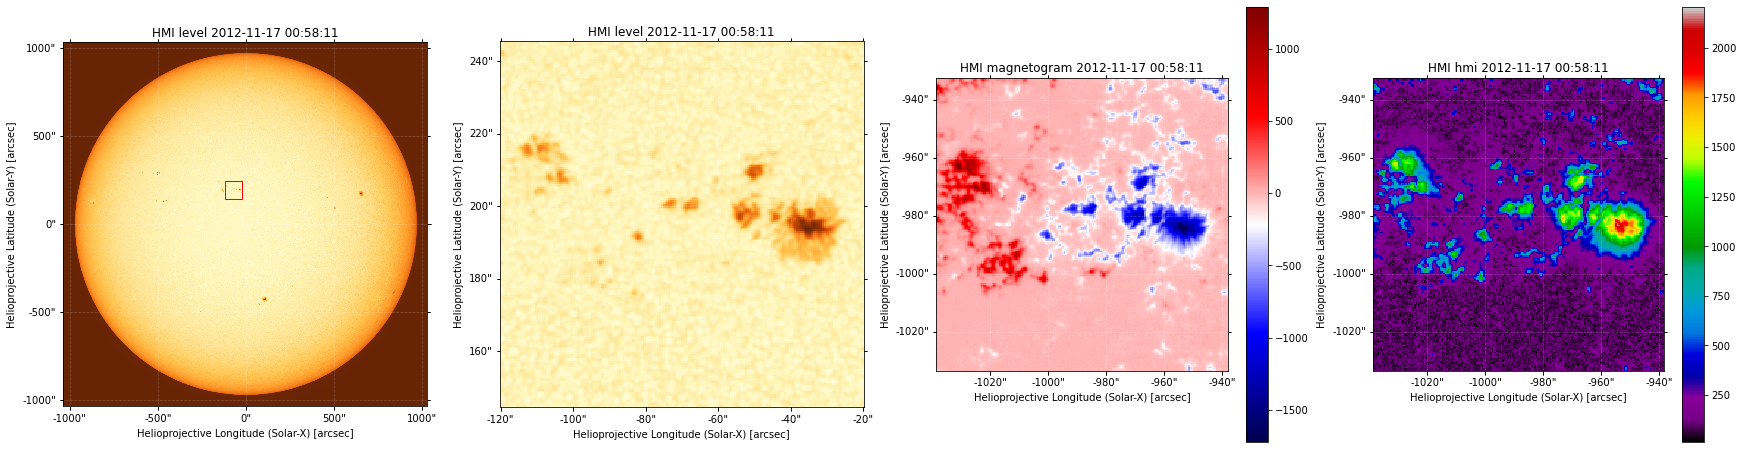

In [8]:
fig=plt.figure(figsize=(30,8))

ax1=fig.add_subplot(1, 4, 1, projection=magnetogram_rmap)
stokes_rmap.plot(axes=ax1)
#magnetogram_rmap.plot(axes=ax1)
stokes_rmap.draw_rectangle(bottom_left, width=width, height=height,color='red')
#magnetogram_rmap.draw_rectangle(bottom_left, width=width, height=height,color='red')


ax2=fig.add_subplot(1, 4, 2, projection=sub_stokes_rmap)
sub_stokes_rmap.plot(axes=ax2)

ax3=fig.add_subplot(1, 4, 3, projection=magnetogram_rmap)
sub_magnetogram_rmap.plot(axes=ax3)
ax3 = plt.colorbar()

ax4=fig.add_subplot(1, 4, 4, projection=B_maps_rmap)
sub_B_maps_rmap.plot(axes=ax4)
ax4 = plt.colorbar()


# 4. Save submaps in a new folder

In [9]:
submaps_stokes_path = project_path +'stokes_data/sub_stokes_'+ date_i_sunspot
print(submaps_stokes_path)
if os.path.exists(submaps_stokes_path):
    shutil.rmtree(submaps_stokes_path)
os.makedirs(submaps_stokes_path)
folder_out_stokes_submaps = submaps_stokes_path+'/'
print(folder_out_stokes_submaps)

submaps_magnetogram_path = project_path + 'magnetograms/submpas_magnetogram_'+ date_i_sunspot
print(submaps_magnetogram_path)
if os.path.exists(submaps_magnetogram_path):
    shutil.rmtree(submaps_magnetogram_path)
os.makedirs(submaps_magnetogram_path)
folder_out_magnetogram_submaps = submaps_magnetogram_path+'/'
print(folder_out_magnetogram_submaps)


B_submaps_path = project_path + 'magnetograms/B_submpas_'+ date_i_sunspot
print(B_submaps_path)
if os.path.exists(B_submaps_path):
    shutil.rmtree(B_submaps_path)
os.makedirs(B_submaps_path)
folder_out_B_submaps = B_submaps_path+'/'
print(folder_out_B_submaps)


/home/miguel/Solar-physics-project/Thesis/stokes_data/sub_stokes_2012-11-17T01:04:00
/home/miguel/Solar-physics-project/Thesis/stokes_data/sub_stokes_2012-11-17T01:04:00/
/home/miguel/Solar-physics-project/Thesis/magnetograms/submpas_magnetogram_2012-11-17T01:04:00
/home/miguel/Solar-physics-project/Thesis/magnetograms/submpas_magnetogram_2012-11-17T01:04:00/
/home/miguel/Solar-physics-project/Thesis/magnetograms/B_submpas_2012-11-17T01:04:00
/home/miguel/Solar-physics-project/Thesis/magnetograms/B_submpas_2012-11-17T01:04:00/


In [10]:
print('Total stokes images to reduce --> ',len(stokes_data_glob))
for i in range(len(stokes_data_glob)):
    print('Reading stokes image --> ',i)
    stokes_xmap = smap.Map(stokes_data_glob[i])
    print('Rotating stokes image --> ',i)
    stokes_rmap = stokes_xmap.rotate()
    print('Getting stokes submap --> ',i)
    stokes_submap=stokes_rmap.submap(bottom_left, width=width, height=height)
    print('Saving stokes submap --> ',i)
    stokes_submap.save(folder_out_stokes_submaps+'submap.'+stokes_data_glob[i][stokes_gn:])

Total stokes images to reduce -->  24
Reading stokes image -->  0
Rotating stokes image -->  0
Getting stokes submap -->  0
Saving stokes submap -->  0
Reading stokes image -->  1
Rotating stokes image -->  1
Getting stokes submap -->  1
Saving stokes submap -->  1
Reading stokes image -->  2
Rotating stokes image -->  2
Getting stokes submap -->  2
Saving stokes submap -->  2
Reading stokes image -->  3
Rotating stokes image -->  3
Getting stokes submap -->  3
Saving stokes submap -->  3
Reading stokes image -->  4
Rotating stokes image -->  4
Getting stokes submap -->  4
Saving stokes submap -->  4
Reading stokes image -->  5
Rotating stokes image -->  5
Getting stokes submap -->  5
Saving stokes submap -->  5
Reading stokes image -->  6
Rotating stokes image -->  6
Getting stokes submap -->  6
Saving stokes submap -->  6
Reading stokes image -->  7
Rotating stokes image -->  7
Getting stokes submap -->  7
Saving stokes submap -->  7
Reading stokes image -->  8
Rotating stokes image 

In [11]:
print('Total magnetogram to reduce --> ',len(magnetogram_data_glob))
for j in range(len(magnetogram_data_glob)):
    print('Reading magnetogram --> ',j)
    magnetogram_xmap = smap.Map(magnetogram_data_glob[j])
    print('Rotating magnetogram --> ',j)
    magnetogram_rmap = magnetogram_xmap.rotate()
    print('Getting magnetogram submap --> ',j)
    magnetogram_submap=magnetogram_rmap.submap(bottom_left, width=width, height=height)
    magnetogram_submap.save(folder_out_magnetogram_submaps+'submap.'+magnetogram_data_glob[j][magnetogram_gn:])
    print('Saving magnetograms --> ',j)

Total magnetogram to reduce -->  1
Reading magnetogram -->  0
Rotating magnetogram -->  0
Getting magnetogram submap -->  0
Saving magnetograms -->  0


In [12]:
print('Total B maps to reduce --> ',len(B_maps_data_glob))    
for k in range(len(B_maps_data_glob)):
    print('Reading B map --> ',k)
    B_mpas_xmap = smap.Map(B_maps_data_glob[k])
    print('Rotating B map --> ',k)
    B_maps_rmap = B_maps_xmap.rotate()
    print('Getting B map submap --> ',k)
    B_maps_submap=B_maps_rmap.submap(bottom_left, width=width, height=height)
    print('Saving B maps --> ',k)
    B_maps_submap.save(folder_out_B_submaps+'submap.'+B_maps_data_glob[k][B_maps_gn:])




    
    

Total B maps to reduce -->  1
Reading B map -->  0
Rotating B map -->  0
Getting B map submap -->  0
Saving B maps -->  0


# 5. Checking saved maps

In [13]:
gn_smaps = stokes_gn + 4
sub_stokes_data_glob = sorted(glob.glob(folder_out_stokes_submaps+'*.fits'))
print(sub_stokes_data_glob[0][gn_smaps:])
hdul = fits.open(sub_stokes_data_glob[0][:])

gn_mmaps = magnetogram_gn + 8
sub_magnetogram_data_glob = sorted(glob.glob(folder_out_magnetogram_submaps+'*.fits'))
print(sub_magnetogram_data_glob[0][gn_mmaps:])
hdul = fits.open(sub_magnetogram_data_glob[0][:])

gn_bmaps = B_maps_gn + 3
sub_B_data_glob = sorted(glob.glob(folder_out_B_submaps+'*.fits'))
print(sub_B_data_glob[0][gn_bmaps:])
hdul = fits.open(sub_B_data_glob[0][:])

hdul.info()
print('number of rows: ',hdul[0].header['NAXIS1'])
print('number of columns: ',hdul[0].header['NAXIS2'])


submap.hmi.s_720s.20121117_010000_TAI.1.I0.fits
submap.hmi.m_720s.20121117_010000_TAI.1.magnetogram.fits
submap.hmi.b_720s.20121117_010000_TAI.field.fits
Filename: /home/miguel/Solar-physics-project/Thesis/magnetograms/B_submpas_2012-11-17T01:04:00/submap.hmi.b_720s.20121117_010000_TAI.field.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     166   (199, 200)   float64   
number of rows:  199
number of columns:  200


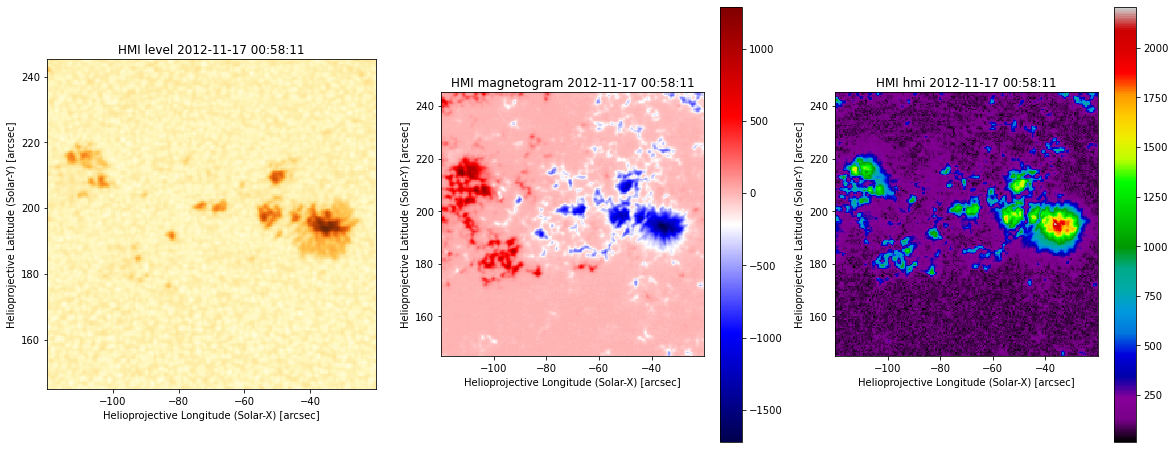

In [14]:
sub_stokes_xmap = smap.Map(sub_stokes_data_glob[0])
sub_magnetogram_xmap = smap.Map(sub_magnetogram_data_glob[0])
sub_B_maps_xmap = smap.Map(sub_B_data_glob[0])

sub_stokes_rmap = sub_stokes_xmap.rotate()
sub_magnetogram_rmap = sub_magnetogram_xmap.rotate()
sub_B_maps_rmap = sub_B_maps_xmap.rotate()

sub_stokes_rmap.plot_settings['cmap'] = plt.cm.YlOrBr_r
sub_magnetogram_rmap.plot_settings['cmap'] = plt.cm.seismic
sub_B_maps_rmap.plot_settings['cmap'] = plt.cm.nipy_spectral

fig=plt.figure(figsize=(20,8))
ax1=fig.add_subplot(1, 3, 1)
sub_stokes_rmap.plot(axes=ax1)

ax2=fig.add_subplot(1, 3, 2)
sub_magnetogram_rmap.plot(axes=ax2)
ax2 = plt.colorbar()

ax3=fig.add_subplot(1, 3, 3)
sub_B_maps_rmap.plot(axes=ax3)
ax3 = plt.colorbar()